# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


from sklearn.preprocessing import StandardScaler,LabelEncoder

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA


### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
df = pd.read_csv('marketing.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [3]:
df.shape

(2240, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [5]:
df.isnull().sum()/len(df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [6]:
df.dropna(inplace=True, how = 'any')

In [7]:
df.isnull().sum()/len(df)*100

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Response               0.0
dtype: float64

In [8]:
df.shape

(2216, 27)

In [9]:
pd.set_option('display.max_columns',1000)

In [10]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [11]:
df.duplicated().value_counts()

False    2216
dtype: int64

### 5. Drop the columns which you think redundant for the analysis 

In [12]:
df.drop(['Dt_Customer','ID'],axis=1, inplace=True)

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [13]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [14]:
df['Marital_Status'].replace({
        'Married'  : 'Relationship',
        'Together' : 'Relationship',
        'Divorced' : 'Single',
        'Widow'    : 'Single',
        'YOLO'     : 'Single',
        'Alone'    : 'Single',
        'Absurd'   : 'Single'
}, inplace=True)

In [15]:
df['Marital_Status'].value_counts()

Relationship    1430
Single           786
Name: Marital_Status, dtype: int64

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [16]:
df['Total_Expenses']=df[[
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']].sum(axis=1,skipna=True)

In [17]:
df[['Total_Expenses']]

,Total_Expenses
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [18]:
df['Num_Total_Purchases']=df[['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases']].sum(axis=1,skipna=True)

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [19]:
df['Kids']=df[['Kidhome','Teenhome']].sum(axis=1,skipna=True)

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [20]:
df['TotalAcceptedCmp']=df[[
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response']].sum(axis=1,skipna=True)

### 11. Drop those columns which we have used above for obtaining new features

In [21]:
df.drop([
'MntWines',
'MntFruits',
'MntMeatProducts',
'MntFishProducts',
'MntSweetProducts',
'MntGoldProds',    
'NumDealsPurchases',
'NumWebPurchases',
'NumCatalogPurchases',
'NumStorePurchases',
'Kidhome','Teenhome',    
'AcceptedCmp3',
'AcceptedCmp4',
'AcceptedCmp5',
'AcceptedCmp1',
'AcceptedCmp2',
'Response'],axis=1, inplace=True)

### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [22]:
df['age']=pd.to_datetime('today').year - df['Year_Birth'] 

In [23]:
df.drop(['Year_Birth'],axis=1, inplace=True)

In [24]:
df.head(4)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,66
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,69
2,Graduation,Relationship,71613.0,26,4,0,776,21,0,0,58
3,Graduation,Relationship,26646.0,26,6,0,53,8,1,0,39


In [25]:
df.reset_index(drop=True, inplace=True)

In [26]:
dfc = df.copy()

In [27]:
dfc.shape

(2216, 11)

### 13. Encode the categorical variables in the dataset

In [28]:
cate = list(df.select_dtypes(include='object'))

In [29]:
cate

['Education', 'Marital_Status']

In [30]:
le = LabelEncoder()

In [31]:
for i in cate:
    print(i)
    df[i] = df[[i]].apply(le.fit_transform)

Education
Marital_Status


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   int32  
 1   Marital_Status       2216 non-null   int32  
 2   Income               2216 non-null   float64
 3   Recency              2216 non-null   int64  
 4   NumWebVisitsMonth    2216 non-null   int64  
 5   Complain             2216 non-null   int64  
 6   Total_Expenses       2216 non-null   int64  
 7   Num_Total_Purchases  2216 non-null   int64  
 8   Kids                 2216 non-null   int64  
 9   TotalAcceptedCmp     2216 non-null   int64  
 10  age                  2216 non-null   int64  
dtypes: float64(1), int32(2), int64(8)
memory usage: 173.2 KB


### 14. Standardize the columns, so that values are in a particular range

In [33]:
ss = StandardScaler()

In [34]:
df1 = df.copy()

In [35]:
df1.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Recency                0
NumWebVisitsMonth      0
Complain               0
Total_Expenses         0
Num_Total_Purchases    0
Kids                   0
TotalAcceptedCmp       0
age                    0
dtype: int64

In [36]:
scaled_features = ss.fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index = df1.index, columns=df1.columns)

In [37]:
scaled_features_df.head(3)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,-0.350527,1.348829,0.234063,0.310532,0.693232,-0.097812,1.675488,1.319446,-1.264803,0.618045,0.986443
1,-0.350527,1.348829,-0.234559,-0.380509,-0.131574,-0.097812,-0.962358,-1.157987,1.405806,-0.502731,1.236801
2,-0.350527,-0.741384,0.769478,-0.795134,-0.543978,-0.097812,0.280250,0.797881,-1.264803,-0.502731,0.318822


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [38]:
cov_matrix = np.cov(scaled_features_df.T)
cov_matrix

array([[ 1.00045147,  0.01457021,  0.12074685, -0.01142336, -0.04084005,
        -0.05088592,  0.09411169,  0.09113856,  0.0547618 ,  0.06501622,
         0.17114208],
       [ 0.01457021,  1.00045147, -0.0046655 ,  0.00137167, -0.00302309,
         0.00537107,  0.01935619, -0.0059506 , -0.04221371,  0.05968763,
         0.00203431],
       [ 0.12074685, -0.0046655 ,  1.00045147, -0.00397155, -0.55333771,
        -0.0272368 ,  0.66787748,  0.56712852, -0.29348436,  0.28811379,
         0.16186447],
       [-0.01142336,  0.00137167, -0.00397155,  1.00045147, -0.01857202,
         0.01364283,  0.02007471,  0.00752238,  0.01829834, -0.09043257,
         0.01630226],
       [-0.04084005, -0.00302309, -0.55333771, -0.01857202,  1.00045147,
         0.01979394, -0.49930729, -0.31406729,  0.41626432, -0.12690041,
        -0.12395988],
       [-0.05088592,  0.00537107, -0.0272368 ,  0.01364283,  0.01979394,
         1.00045147, -0.03744452, -0.02096109,  0.03178809, -0.01785965,
         0.030

In [39]:
eig_vals , eig_vectors = np.linalg.eig(cov_matrix)

In [40]:
eig_vals

array([3.19743788, 0.1582039 , 0.33033131, 1.25518382, 0.57604186,
       0.69962761, 0.81234783, 0.88535512, 1.07767021, 0.99659123,
       1.01617535])

In [41]:
eig_vectors

array([[-8.10934200e-02, -1.65755852e-02,  2.47000925e-02,
         5.52112511e-01,  1.04385603e-01, -1.07281709e-01,
        -6.80920735e-01, -2.28804115e-01,  3.58063297e-01,
         1.35916950e-01,  5.11659690e-02],
       [-1.72829367e-02, -2.45149658e-04, -2.50392171e-03,
        -8.32514642e-02, -1.50323812e-02, -1.54674464e-01,
         1.00331772e-01,  2.52706214e-01,  3.19425047e-01,
         5.63717855e-01, -6.89113145e-01],
       [-4.54729146e-01, -1.10098350e-01, -7.36892742e-01,
         1.10552861e-01, -3.95510448e-01, -2.34022911e-01,
         2.66790193e-02,  7.99063228e-02, -7.27766026e-02,
        -3.36946100e-02,  3.38100741e-02],
       [ 5.43377454e-03, -3.64204293e-02, -1.60103745e-02,
         1.10172307e-01, -5.30900834e-02,  1.48760250e-01,
        -1.77824148e-02, -4.67923665e-01, -6.47981936e-01,
         5.64582321e-01, -5.83012048e-02],
       [ 3.78023484e-01,  9.71896699e-02, -5.19301941e-01,
         3.41113919e-02,  4.50156083e-01, -8.53947210e-02,
  

In [42]:
total = sum(eig_vals)

In [43]:
var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse=True)]

In [44]:
var_exp

[29.054499930848838,
 11.405612718764878,
 9.792580888169283,
 9.233789001122435,
 9.055831894538443,
 8.045050825968204,
 7.381647735020258,
 6.357380864716698,
 5.234381058283281,
 3.001656785315937,
 1.4375682972517467]

In [45]:
cum_var_exp = np.cumsum(var_exp)

In [46]:
cum_var_exp

array([ 29.05449993,  40.46011265,  50.25269354,  59.48648254,
        68.54231443,  76.58736526,  83.96901299,  90.32639386,
        95.56077492,  98.5624317 , 100.        ])

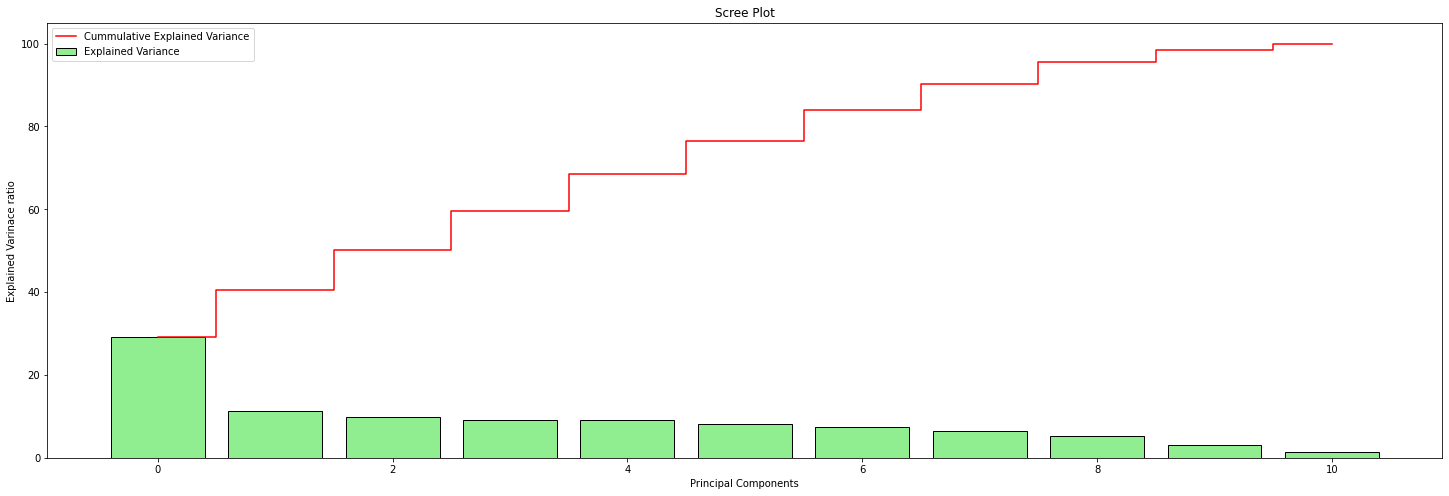

In [47]:
plt.figure(figsize=(25,8))
plt.bar(range(11),var_exp,align='center',color = 'lightgreen',edgecolor = 'black',label = 'Explained Variance')
plt.step(range(11),cum_var_exp,where = 'mid',color = 'red',label = 'Cummulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varinace ratio')
plt.title('Scree Plot')
plt.legend(loc = 'best') 
plt.show()

- We Can onserve that 8-9 Princiapl componemets is sufficent 90-95% of of the variations , So we can choose 8 PCA as optimun

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [48]:
pca = PCA(n_components=8)

In [49]:
pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.955618,-0.108077,-0.373361,1.127306,-0.780136,-0.274046,-1.182249,-0.364338
1,-1.513599,0.997303,-0.410274,0.969169,-0.488887,1.385206,-0.707487,-0.338797


In [50]:
cluster_errors = []
cluster_range = range(2,15)
for num in cluster_range:
    clusters = KMeans(num, random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

In [51]:
cluster_df = pd.DataFrame({'num of cluster' : cluster_range,
                           'cluster Errors' : cluster_errors})

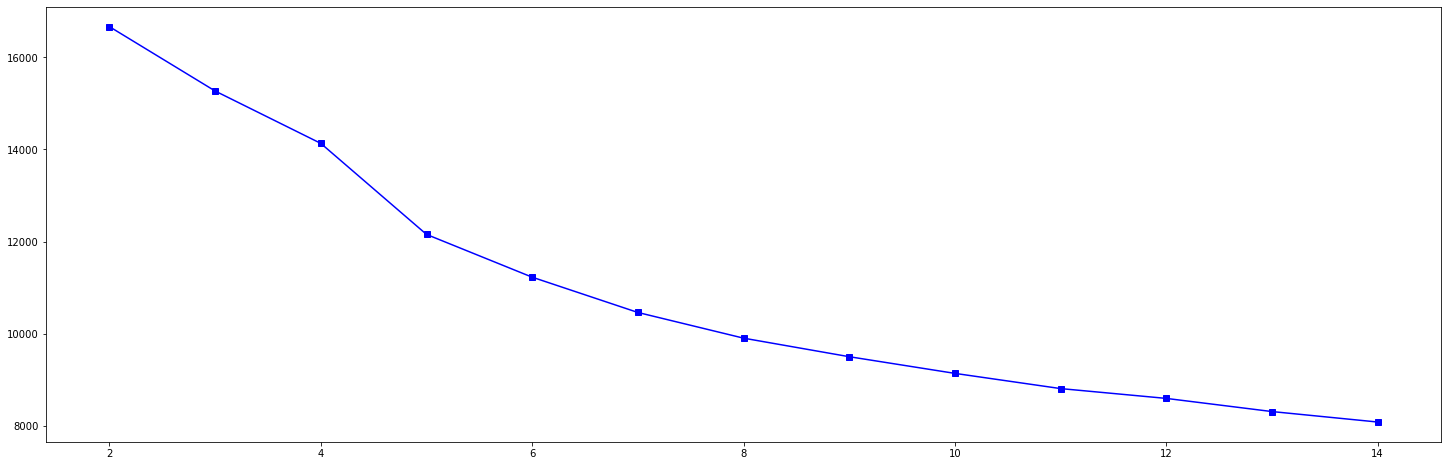

In [52]:
plt.figure(figsize=(25,8))
plt.plot(cluster_df['num of cluster'], cluster_df['cluster Errors'], marker ='s',color = 'b')
plt.show()

- From the above elbow plot we onserve that K3 we see significanlty decrease , So we can choose K=3

In [53]:
Kmeans = KMeans(n_clusters=3,random_state=100)

In [54]:
Kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [55]:
label = pd.DataFrame(Kmeans.labels_,columns=['Label'])

In [56]:
Kmeans_df = pca_df.join(label)

In [57]:
Kmeans_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,1.955618,-0.108077,-0.373361,1.127306,-0.780136,-0.274046,-1.182249,-0.364338,0
1,-1.513599,0.997303,-0.410274,0.969169,-0.488887,1.385206,-0.707487,-0.338797,1
2,1.313208,-0.290223,0.326646,-0.696521,0.788293,0.976933,0.050120,0.056151,0
3,-1.758019,-1.121067,-0.221100,-0.789217,0.644830,0.210865,0.578990,0.244709,1
4,0.058398,0.579276,0.915867,-0.779536,-0.793376,-1.249352,1.308788,0.877959,2
5,0.464210,0.625545,-0.522337,-0.720952,0.987566,0.261906,-0.038187,0.828238,2
6,0.101625,-0.230413,-0.511066,0.766009,-0.463786,0.630394,-0.662032,1.007670,2
7,-1.601694,-0.084699,-0.899820,-0.846265,0.345586,-0.740808,1.452754,0.714309,1
8,-1.730151,0.201737,-1.732500,-0.579881,0.755228,-0.919250,1.071910,-0.509744,1
9,-4.342556,2.243022,-1.787368,0.063681,0.206744,-3.378329,-1.226085,-1.427645,1


In [58]:
Kmeans_df['Label'].value_counts()

1    985
2    712
0    519
Name: Label, dtype: int64

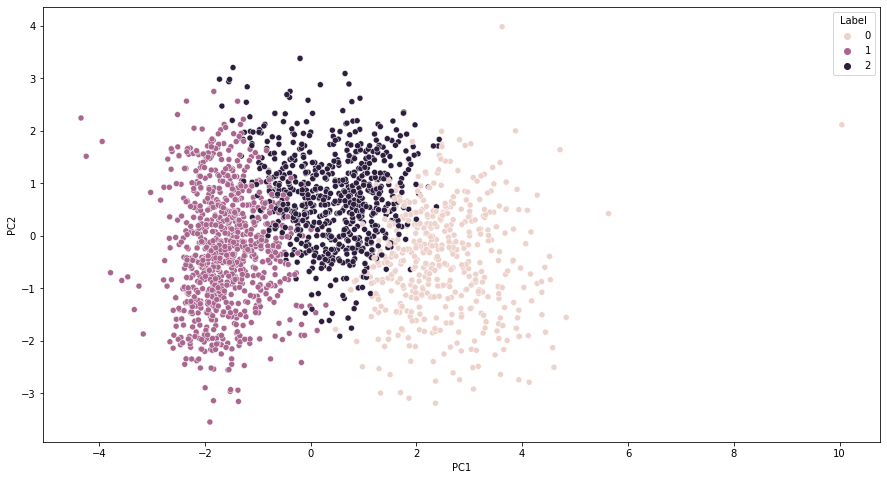

In [59]:
plt.figure(figsize=(15,8))
sns.scatterplot(Kmeans_df['PC1'],
                Kmeans_df['PC2'],
               hue = 'Label',
               data=Kmeans_df)
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

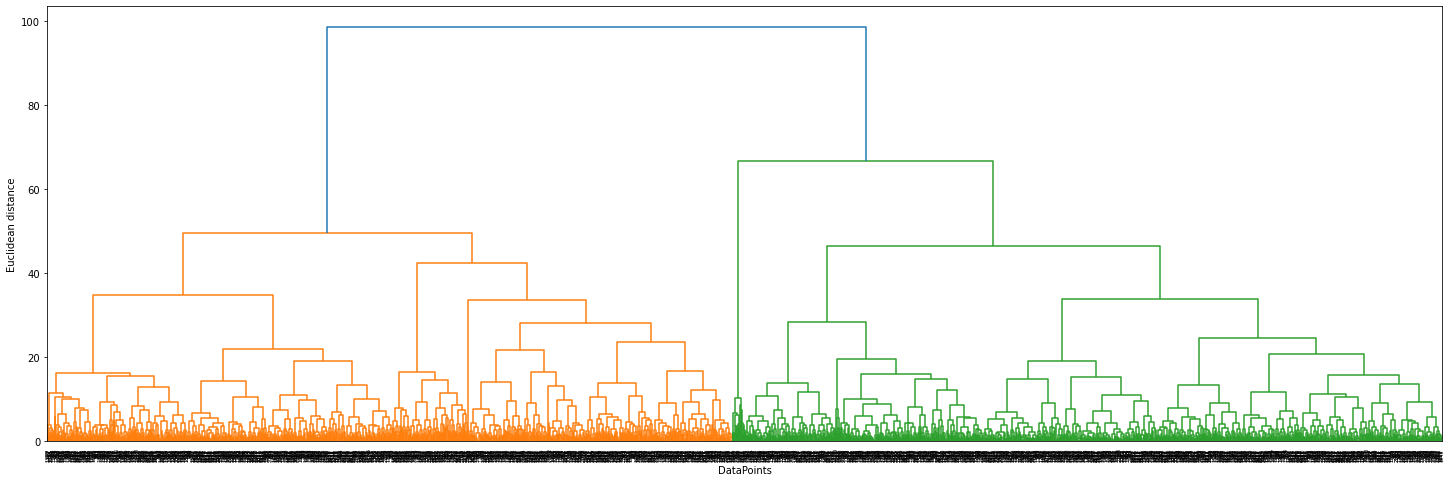

In [60]:
plt.figure(figsize=(25,8))
merg = linkage(scaled_features, method='ward')
dendrogram(merg,leaf_rotation=90)
plt.xlabel('DataPoints')
plt.ylabel('Euclidean distance')
plt.show()

### Silhoutte Score for Agglomertive clustring 

In [61]:
from sklearn.metrics import silhouette_score

In [62]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier= hier.fit(scaled_features_df)
    labels =hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,labels))

2 0.19828651112921825
3 0.2076570855352913
4 0.14098576070077784
5 0.12195016852988998
6 0.1293417188499032
7 0.12730056695528497
8 0.10455739501937866
9 0.10599638386483391
10 0.11027999819596734
11 0.11413956824302375
12 0.10703732083358092
13 0.10627152736087282
14 0.10132092908805498


- From the observation of dendogram and silhouette scores, the highest silhouette score is for the cluster 3

In [63]:
hie_cluster = AgglomerativeClustering(n_clusters =3,affinity='euclidean',linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_features_df)

In [64]:
df_label1 = pd.DataFrame(hie_cluster_model.labels_, columns=['Label'])

In [65]:
df_label1.head()

,Label
0,0
1,1
2,0
3,1
4,1


In [66]:
df_label1.shape

(2216, 1)

In [67]:
df_hier = dfc.join(df_label1)
df_hier.tail()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age,Label
2211,Graduation,Relationship,61223.0,46,5,0,1341,18,1,0,56,0
2212,PhD,Relationship,64014.0,56,7,0,444,22,3,1,77,0
2213,Graduation,Single,56981.0,91,6,0,1241,19,0,1,42,0
2214,Master,Relationship,69245.0,8,3,0,843,23,1,0,67,0
2215,PhD,Relationship,52869.0,40,7,0,172,11,2,1,69,1


In [68]:
df_hier['Label'].value_counts()

1    1107
0    1088
2      21
Name: Label, dtype: int64

In [69]:
df_hier.shape

(2216, 12)

In [70]:
df_hier

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age,Label
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,66,0
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,69,1
2,Graduation,Relationship,71613.0,26,4,0,776,21,0,0,58,0
3,Graduation,Relationship,26646.0,26,6,0,53,8,1,0,39,1
4,PhD,Relationship,58293.0,94,5,0,422,19,1,0,42,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2211,Graduation,Relationship,61223.0,46,5,0,1341,18,1,0,56,0
2212,PhD,Relationship,64014.0,56,7,0,444,22,3,1,77,0
2213,Graduation,Single,56981.0,91,6,0,1241,19,0,1,42,0
2214,Master,Relationship,69245.0,8,3,0,843,23,1,0,67,0


### Visualization and Interpretation of results

In [71]:
df_hier['Label'].value_counts()

1    1107
0    1088
2      21
Name: Label, dtype: int64

In [72]:
len(list(df_hier))

12

Education


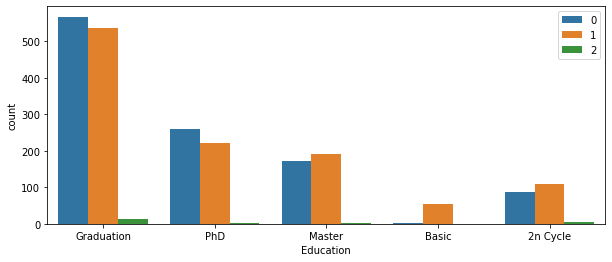

Marital_Status


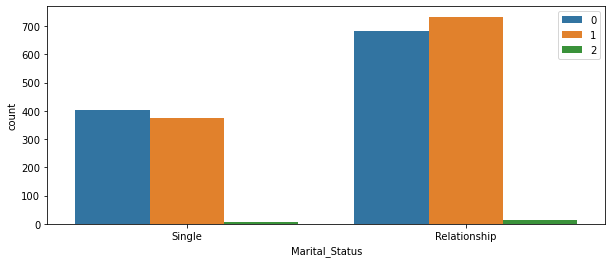

Income


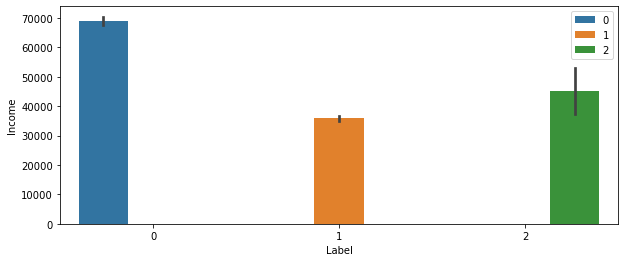

Recency


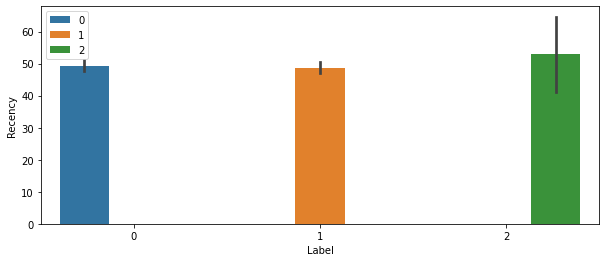

NumWebVisitsMonth


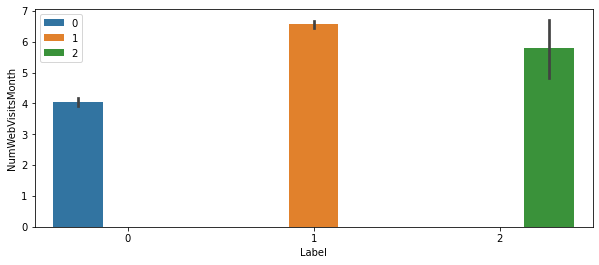

Complain


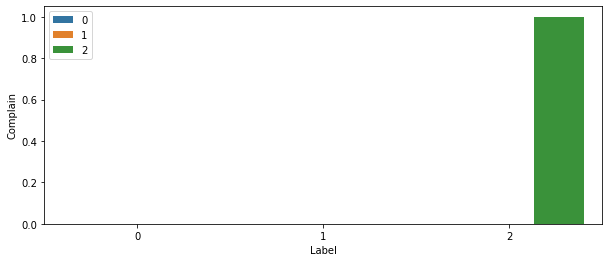

Total_Expenses


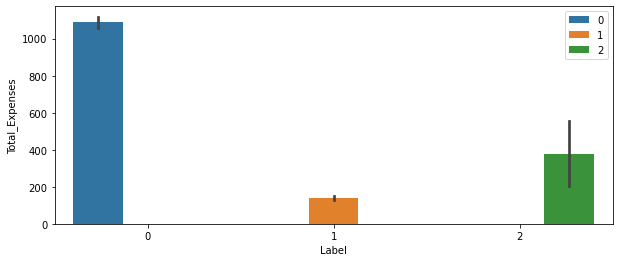

Num_Total_Purchases


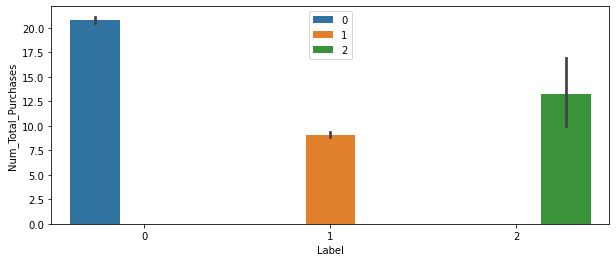

Kids


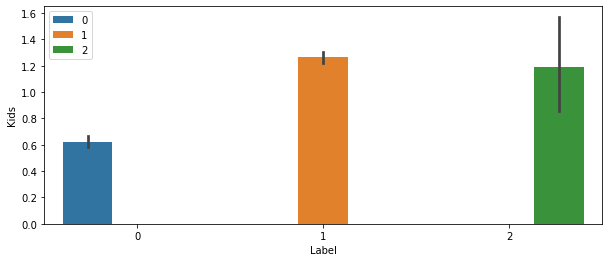

TotalAcceptedCmp


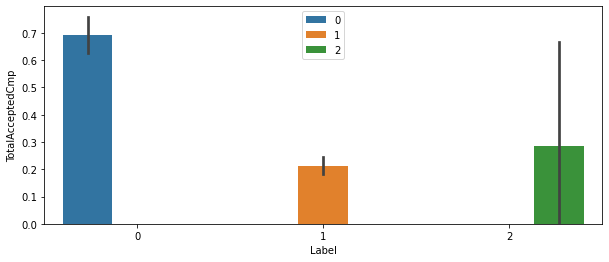

age


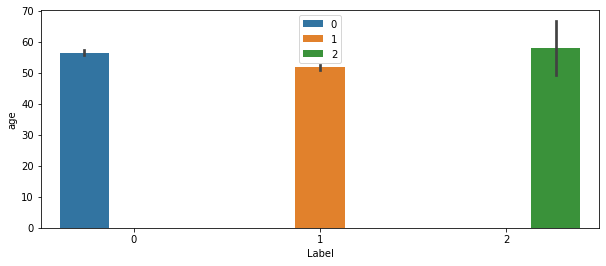

Label


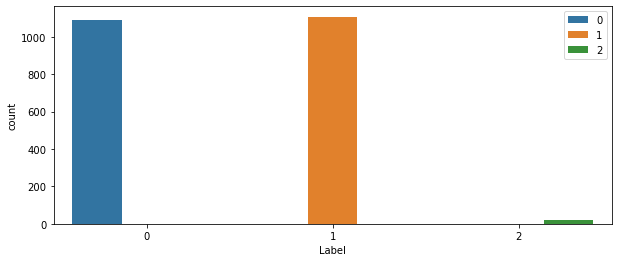

In [73]:
for features in list(df_hier):
    print(features)
    if (df_hier[features].dtype=='O') | (features=='Label'):
        plt.figure(figsize=(10,4))
        sns.countplot(df_hier[features], hue = df_hier.Label)
        plt.legend(loc = 'best')
        plt.show()
    else:
        plt.figure(figsize=(10,4))
        sns.barplot(df_hier.Label,df_hier[features], hue = df_hier.Label)
        plt.legend(loc = 'best')
        plt.show()

### Observation
- Cluster 0  belongs to high income group with maximum acceptance & purchase 
- Cluster 1  belongs to low income group with less accptance to complain and low purchase but big in numbers 
- Cluster 2  belongs has moderate acceptance to camplain also has compliant about product ,do maximum visits to web  and active customers  but less in numbers


-----
## Happy Learning
-----